In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import chi2_contingency

pd.set_option("display.max_columns", 100)
pd.set_option("display.float_format", "{:,.2f}".format)

In [7]:
#Load CLEANED Excel file from Phase 1–2
df = pd.read_excel("t2d_OBDEXP19_final_imputed.xlsx")

print("Shape of cleaned dataset:", df.shape)
print("\nPreview:")
print(df.head())

Shape of cleaned dataset: (2289, 12)

Preview:
     DUPERSID  AGE53X AGEGRP  EDUCYR SEX_LABEL RACE_LABEL GENHLTH_LABEL  \
0  2320012102      79    65+      12    Female      White     Very good   
1  2320022102      52  45–64      12    Female      White          Good   
2  2320034101      54  45–64      12    Female   Hispanic          Good   
3  2320040101      61  45–64      12      Male      White          Good   
4  2320050101      38  30–44      14    Female      White          Fair   

      SMOKE_LABEL        HIBP_LABEL            CHOL_LABEL     PA_LEVEL  \
0      Non-smoker  Has hypertension  Has high cholesterol  Not limited   
1  Current smoker  Has hypertension  Has high cholesterol      Limited   
2      Non-smoker   No hypertension   No high cholesterol  Not limited   
3      Non-smoker  Has hypertension   No high cholesterol  Not limited   
4  Current smoker  Has hypertension   No high cholesterol  Not limited   

   OBDEXP19  
0    562.00  
1      0.00  
2      0.00  
3


=== Distribution of OBDEXP19 (Office-based Doctor Expenditures) ===
N: 2289
Mean: 944.2114460463084
Median: 612.0
Std: 964.4002821104252
Min: 0.0
Max: 4090.0
Skewness: 1.2856865267031836
Kurtosis: 0.9192049545277392


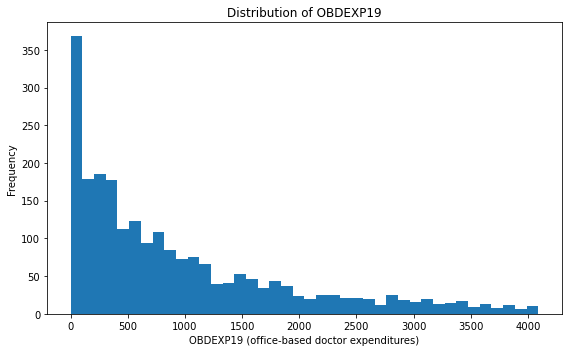

In [8]:
#Descriptive statistics for OBDEXP19
obd = df["OBDEXP19"]

print("\n=== Distribution of OBDEXP19 (Office-based Doctor Expenditures) ===")
print("N:", len(obd))
print("Mean:", obd.mean())
print("Median:", obd.median())
print("Std:", obd.std())
print("Min:", obd.min())
print("Max:", obd.max())
print("Skewness:", obd.skew())
print("Kurtosis:", obd.kurtosis())

plt.figure(figsize=(8,5))
plt.hist(obd, bins=40)
plt.title("Distribution of OBDEXP19")
plt.xlabel("OBDEXP19 (office-based doctor expenditures)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [9]:
#Kruskal–Wallis tests (categorical predictors vs OBDEXP19)
def kw_test(data, group_col, value_col="OBDEXP19"):
    """
    Kruskal–Wallis test comparing OBDEXP19 across levels of 'group_col'.
    Prints group summary and test results.
    """
    tmp = data[[group_col, value_col]].dropna()
    groups = sorted(tmp[group_col].unique())

    print(f"\n=== Kruskal–Wallis Test: {group_col} vs {value_col} ===")
    print("Number of groups:", len(groups))

    # Descriptive summary by group
    summary = (
        tmp.groupby(group_col)[value_col]
        .agg(["count", "mean", "median", "std", "min", "max"])
        .sort_values("median", ascending=False)
    )
    print("\nGroup summary (sorted by median):")
    print(summary)

    # Prepare data arrays
    arrays = [tmp[tmp[group_col] == g][value_col] for g in groups]
    H, p = stats.kruskal(*arrays)

    print("\nKruskal–Wallis Test Results:")
    print(f"H statistic = {H:.4f}")
    print(f"p-value     = {p:.6f}")
    return H, p

# Run Kruskal–Wallis for key predictors
kw_test(df, "SEX_LABEL")
kw_test(df, "RACE_LABEL")
kw_test(df, "GENHLTH_LABEL")
kw_test(df, "HIBP_LABEL")
kw_test(df, "CHOL_LABEL")
kw_test(df, "SMOKE_LABEL")
kw_test(df, "AGEGRP")
kw_test(df, "PA_LEVEL")


=== Kruskal–Wallis Test: SEX_LABEL vs OBDEXP19 ===
Number of groups: 2

Group summary (sorted by median):
           count   mean  median    std  min      max
SEX_LABEL                                           
Female      1166 977.78  652.00 956.84 0.00 4,087.00
Male        1123 909.35  584.00 971.39 0.00 4,090.00

Kruskal–Wallis Test Results:
H statistic = 7.0875
p-value     = 0.007762

=== Kruskal–Wallis Test: RACE_LABEL vs OBDEXP19 ===
Number of groups: 5

Group summary (sorted by median):
            count     mean  median      std  min      max
RACE_LABEL                                               
White        1175 1,026.46  703.00 1,001.25 0.00 4,090.00
Asian         112   923.53  679.00   865.04 0.00 3,887.00
Black         422   919.69  600.00   958.97 0.00 4,018.00
Other         101   848.74  478.00   941.41 0.00 3,422.00
Hispanic      479   789.02  473.00   881.59 0.00 4,046.00

Kruskal–Wallis Test Results:
H statistic = 27.6582
p-value     = 0.000015

=== Kruskal–Walli

(5.9817335844003905, 0.014454787286756657)

<Figure size 576x360 with 0 Axes>

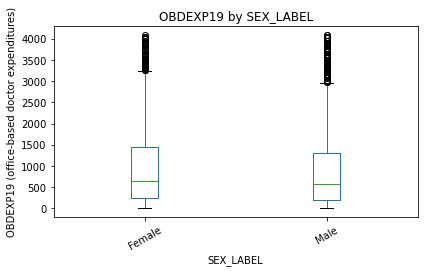

<Figure size 576x360 with 0 Axes>

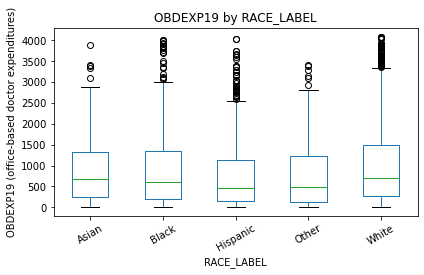

<Figure size 576x360 with 0 Axes>

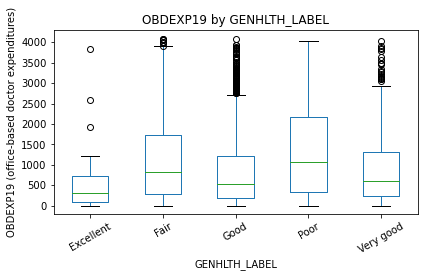

<Figure size 576x360 with 0 Axes>

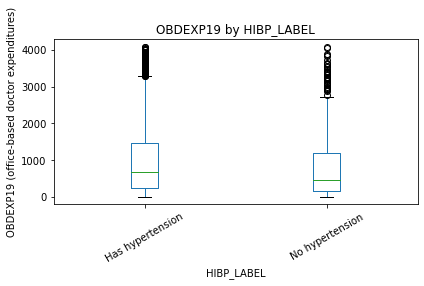

<Figure size 576x360 with 0 Axes>

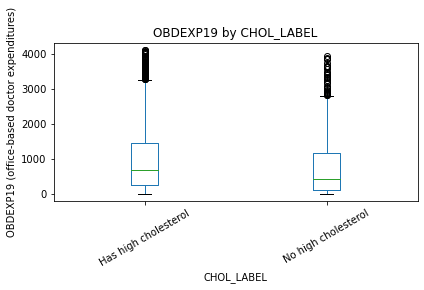

<Figure size 576x360 with 0 Axes>

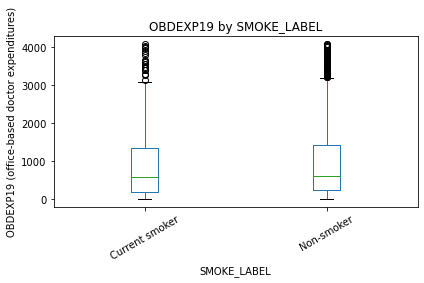

<Figure size 576x360 with 0 Axes>

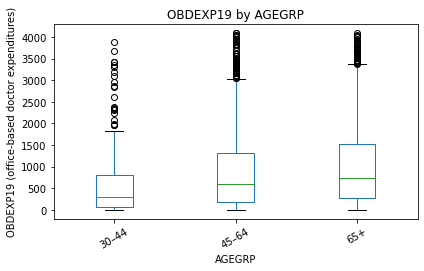

<Figure size 576x360 with 0 Axes>

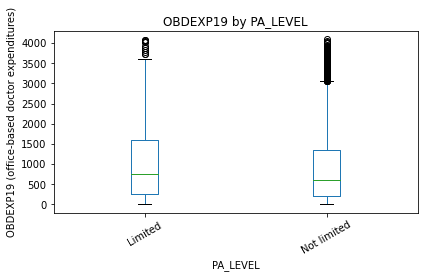

In [10]:
#Boxplots of OBDEXP19 by categorical variables
def boxplot_exp(data, group_col, value_col="OBDEXP19"):
    tmp = data[[group_col, value_col]].dropna()
    plt.figure(figsize=(8,5))
    tmp.boxplot(column=value_col, by=group_col, grid=False)
    plt.suptitle("")  # remove default pandas super-title
    plt.title(f"{value_col} by {group_col}")
    plt.xlabel(group_col)
    plt.ylabel("OBDEXP19 (office-based doctor expenditures)")
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

#boxplots
boxplot_exp(df, "SEX_LABEL")
boxplot_exp(df, "RACE_LABEL")
boxplot_exp(df, "GENHLTH_LABEL")
boxplot_exp(df, "HIBP_LABEL")
boxplot_exp(df, "CHOL_LABEL")
boxplot_exp(df, "SMOKE_LABEL")
boxplot_exp(df, "AGEGRP")
boxplot_exp(df, "PA_LEVEL")

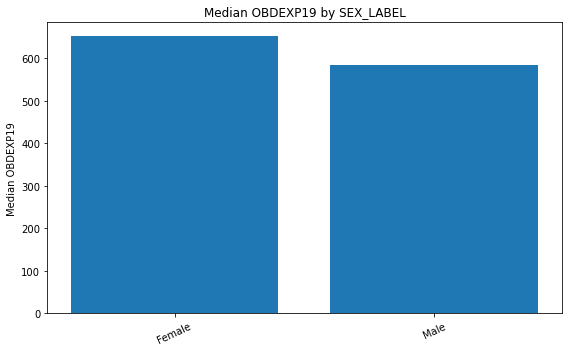


Median OBDEXP19 by SEX_LABEL:
SEX_LABEL
Female   652.00
Male     584.00
Name: OBDEXP19, dtype: float64


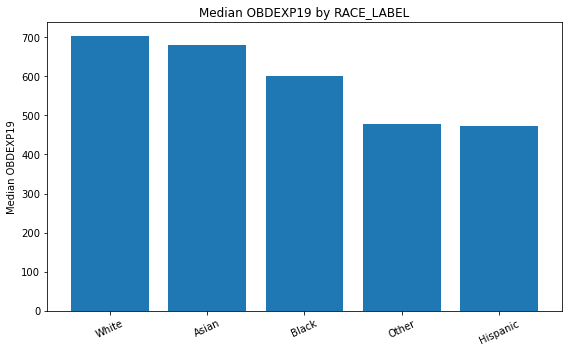


Median OBDEXP19 by RACE_LABEL:
RACE_LABEL
White      703.00
Asian      679.00
Black      600.00
Other      478.00
Hispanic   473.00
Name: OBDEXP19, dtype: float64


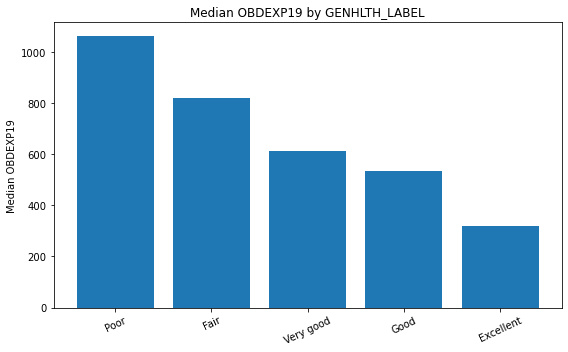


Median OBDEXP19 by GENHLTH_LABEL:
GENHLTH_LABEL
Poor        1,061.50
Fair          820.00
Very good     611.00
Good          535.00
Excellent     317.00
Name: OBDEXP19, dtype: float64


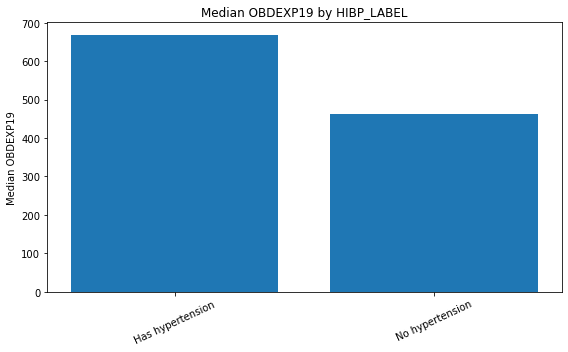


Median OBDEXP19 by HIBP_LABEL:
HIBP_LABEL
Has hypertension   667.50
No hypertension    462.00
Name: OBDEXP19, dtype: float64


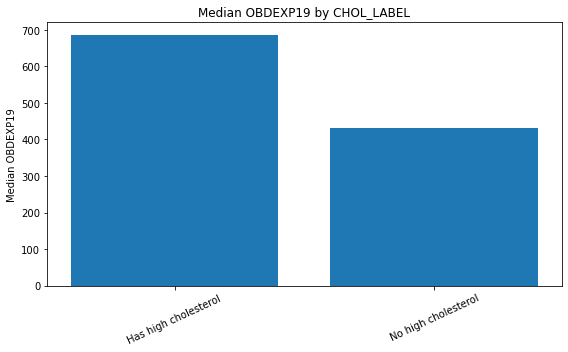


Median OBDEXP19 by CHOL_LABEL:
CHOL_LABEL
Has high cholesterol   686.00
No high cholesterol    430.00
Name: OBDEXP19, dtype: float64


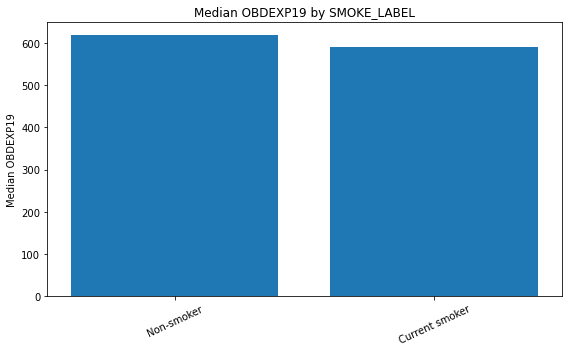


Median OBDEXP19 by SMOKE_LABEL:
SMOKE_LABEL
Non-smoker       618.00
Current smoker   591.00
Name: OBDEXP19, dtype: float64


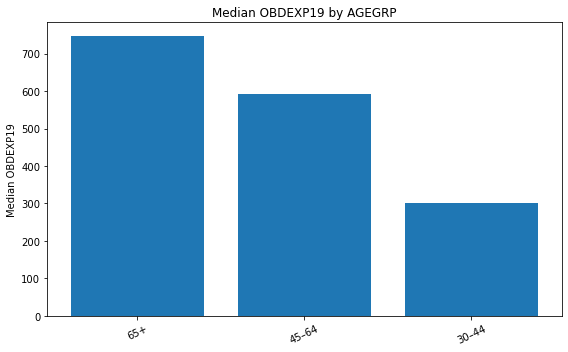


Median OBDEXP19 by AGEGRP:
AGEGRP
65+     746.00
45–64   593.00
30–44   302.50
Name: OBDEXP19, dtype: float64


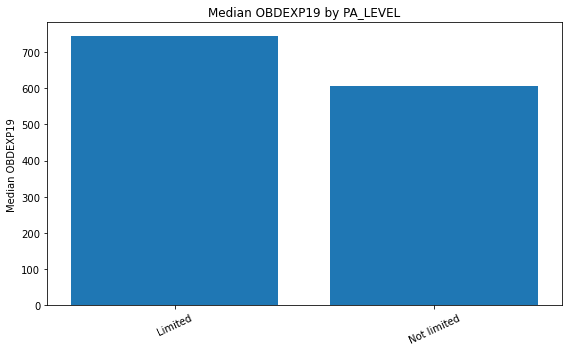


Median OBDEXP19 by PA_LEVEL:
PA_LEVEL
Limited       744.00
Not limited   606.00
Name: OBDEXP19, dtype: float64


In [11]:
#Bar charts of MEDIAN OBDEXP19 by group
def bar_chart_median(data, group_col, value_col="OBDEXP19"):
    """
    Bar chart of median OBDEXP19 by category (matches Kruskal–Wallis & boxplots).
    """
    medians = (
        data.groupby(group_col)[value_col]
        .median()
        .sort_values(ascending=False)
    )

    plt.figure(figsize=(8,5))
    plt.bar(medians.index, medians.values)
    plt.xticks(rotation=25)
    plt.ylabel("Median OBDEXP19")
    plt.title(f"Median OBDEXP19 by {group_col}")
    plt.tight_layout()
    plt.show()

    print(f"\nMedian OBDEXP19 by {group_col}:")
    print(medians)

#median bar charts
bar_chart_median(df, "SEX_LABEL")
bar_chart_median(df, "RACE_LABEL")
bar_chart_median(df, "GENHLTH_LABEL")
bar_chart_median(df, "HIBP_LABEL")
bar_chart_median(df, "CHOL_LABEL")
bar_chart_median(df, "SMOKE_LABEL")
bar_chart_median(df, "AGEGRP")
bar_chart_median(df, "PA_LEVEL")

In [12]:
#Chi-squared test + Cramer's V for categorical–categorical
def chi2_cramers_v(data, col1, col2):
    """
    Chi-squared test of independence + bias-corrected Cramer's V.
    """
    ct = pd.crosstab(data[col1], data[col2])
    chi2, p, dof, expected = chi2_contingency(ct)

    n = ct.values.sum()
    phi2 = chi2 / n
    r, k = ct.shape

    # Bias-corrected Cramer's V
    phi2_corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    r_corr = r - ((r-1)**2)/(n-1)
    k_corr = k - ((k-1)**2)/(n-1)
    V = np.sqrt(phi2_corr / min((k_corr-1), (r_corr-1)))

    print(f"\n=== Chi-squared & Cramer's V: {col1} vs {col2} ===")
    print("\nContingency table:")
    print(ct)
    print(f"\nChi-squared = {chi2:.4f}, df = {dof}, p-value = {p:.6f}")
    print(f"Cramer's V  = {V:.4f}")

    # Optional: significance at p < 0.001
    if p < 0.001:
        print("➡ Result: Significant at p < 0.001")
    else:
        print("➡ Result: Not significant at the p < 0.001 level")

    return chi2, p, V

# Example chi-square analyses
chi2_cramers_v(df, "SEX_LABEL", "PA_LEVEL")
chi2_cramers_v(df, "RACE_LABEL", "PA_LEVEL")
chi2_cramers_v(df, "RACE_LABEL", "AGEGRP")
chi2_cramers_v(df, "SEX_LABEL", "AGEGRP")


=== Chi-squared & Cramer's V: SEX_LABEL vs PA_LEVEL ===

Contingency table:
PA_LEVEL   Limited  Not limited
SEX_LABEL                      
Female         102         1064
Male           154          969

Chi-squared = 13.7035, df = 1, p-value = 0.000214
Cramer's V  = 0.0745
➡ Result: Significant at p < 0.001

=== Chi-squared & Cramer's V: RACE_LABEL vs PA_LEVEL ===

Contingency table:
PA_LEVEL    Limited  Not limited
RACE_LABEL                      
Asian             4          108
Black            36          386
Hispanic         28          451
Other            20           81
White           168         1007

Chi-squared = 42.2895, df = 4, p-value = 0.000000
Cramer's V  = 0.1294
➡ Result: Significant at p < 0.001

=== Chi-squared & Cramer's V: RACE_LABEL vs AGEGRP ===

Contingency table:
AGEGRP      30–44  45–64  65+
RACE_LABEL                   
Asian          14     42   56
Black          33    169  220
Hispanic       70    225  184
Other          23     41   37
White         10

(1.7138347802840428, 0.42446853853708655, 0.0)


=== Pearson Correlation Matrix ===
          AGE53X  EDUCYR  OBDEXP19
AGE53X      1.00    0.01      0.13
EDUCYR      0.01    1.00      0.08
OBDEXP19    0.13    0.08      1.00


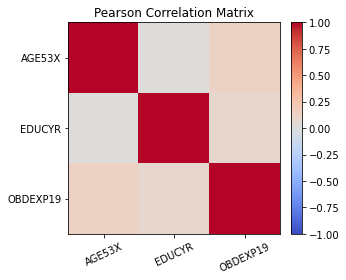

In [13]:
#Pearson correlation matrix for numeric variables
numeric_cols = ["AGE53X", "EDUCYR", "OBDEXP19"]

corr = df[numeric_cols].corr(method="pearson")

print("\n=== Pearson Correlation Matrix ===")
print(corr)

plt.figure(figsize=(5,4))
im = plt.imshow(corr, vmin=-1, vmax=1, cmap="coolwarm")
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=25)
plt.yticks(range(len(numeric_cols)), numeric_cols)
plt.title("Pearson Correlation Matrix")
plt.tight_layout()
plt.show()